In [1]:
%matplotlib inline

In [2]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete, good_profile_mask = load_umachine_sdss_with_meert15()

sdss = full_sdss[behroozi_complete & good_profile_mask]
print("Number of M*-complete SDSS galaxies with good profile measurements = {0}".format(len(sdss)))


Number of M*-complete SDSS galaxies with good profile measurements = 229889


In [3]:
print(sdss.keys())

['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'logsm_bell03_meert15', 'ssfr']


In [4]:
from slidingpercentile import python_sliding_rank

x = sdss['logsm_bell03_meert15']
y = sdss['r50_magr_kpc_meert15']
window_length = 201

sliding_rank_orders = python_sliding_rank(x, y, window_length)
size_percentile = (1. + sliding_rank_orders)/float(window_length+1)
sdss['r50_magr_kpc_meert15_percentile'] = size_percentile

In [5]:
from galsize_models.measurements.measure_sdss_clustering import save_wp_measurement

import os
repo_dirname = "/Users/aphearin/work/repositories/python/galsize_models"
output_subdirname = "galsize_models/measurements/data/two_point_functions"
output_dirname = os.path.join(repo_dirname, output_subdirname)

logsm_high = 15

sdss['orig_sm'] = np.copy(sdss['sm'])

In [8]:
sdss['sm'] = sdss['logsm_bell03_meert15']

logsm_min = 9.75
sm_mask = sdss['sm'] > logsm_min
save_wp_measurement(sdss[sm_mask], output_dirname, 'sdss_sm9p75_smbell', logsm_min, logsm_high)

small_mask = sm_mask & (sdss['r50_magr_kpc_meert15_percentile'] < 0.5)
save_wp_measurement(sdss[small_mask], output_dirname, 'sdss_sm9p75_smbell_small', logsm_min, logsm_high)

large_mask = sm_mask & (sdss['r50_magr_kpc_meert15_percentile'] >= 0.5)
save_wp_measurement(sdss[large_mask], output_dirname, 'sdss_sm9p75_smbell_large', logsm_min, logsm_high)

Measuring wp for sdss_sm9p75_smbell sample of 203143 galaxies
Measuring wp for sdss_sm9p75_smbell_small sample of 101021 galaxies
Measuring wp for sdss_sm9p75_smbell_large sample of 102122 galaxies


In [9]:
rp = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_rp.npy'))
wp_sdss_sm9p75_smbell = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_wp.npy'))
wp_sdss_sm9p75_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_small_wp.npy'))
wp_sdss_sm9p75_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_large_wp.npy'))
fracdiff_sm9p75_smbell = (wp_sdss_sm9p75_smbell_large-wp_sdss_sm9p75_smbell_small)/wp_sdss_sm9p75_smbell

In [12]:
logsm_min = 10.25
sm_mask = sdss['sm'] > logsm_min
save_wp_measurement(sdss[sm_mask], output_dirname, 'sdss_sm10p25_smbell', logsm_min, logsm_high)

small_mask = sm_mask & (sdss['r50_magr_kpc_meert15_percentile'] < 0.5)
save_wp_measurement(sdss[small_mask], output_dirname, 'sdss_sm10p25_smbell_small', logsm_min, logsm_high)

large_mask = sm_mask & (sdss['r50_magr_kpc_meert15_percentile'] >= 0.5)
save_wp_measurement(sdss[large_mask], output_dirname, 'sdss_sm10p25_smbell_large', logsm_min, logsm_high)

Measuring wp for sdss_sm10p25_smbell sample of 181218 galaxies
Measuring wp for sdss_sm10p25_smbell_small sample of 90105 galaxies
Measuring wp for sdss_sm10p25_smbell_large sample of 91113 galaxies


In [13]:
rp = np.load(os.path.join(output_dirname, 'sdss_sm10p25_smbell_rp.npy'))
wp_sdss_sm10p25_smbell = np.load(os.path.join(output_dirname, 'sdss_sm10p25_smbell_wp.npy'))
wp_sdss_sm10p25_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm10p25_smbell_small_wp.npy'))
wp_sdss_sm10p25_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm10p25_smbell_large_wp.npy'))
fracdiff_sm10p25_smbell = (wp_sdss_sm10p25_smbell_large-wp_sdss_sm10p25_smbell_small)/wp_sdss_sm10p25_smbell

In [16]:
logsm_min = 10.75
sm_mask = sdss['sm'] > logsm_min
save_wp_measurement(sdss[sm_mask], output_dirname, 'sdss_sm10p75_smbell', logsm_min, logsm_high)

small_mask = sm_mask & (sdss['r50_magr_kpc_meert15_percentile'] < 0.5)
save_wp_measurement(sdss[small_mask], output_dirname, 'sdss_sm10p75_smbell_small', logsm_min, logsm_high)

large_mask = sm_mask & (sdss['r50_magr_kpc_meert15_percentile'] >= 0.5)
save_wp_measurement(sdss[large_mask], output_dirname, 'sdss_sm10p75_smbell_large', logsm_min, logsm_high)

Measuring wp for sdss_sm10p75_smbell sample of 135083 galaxies
Measuring wp for sdss_sm10p75_smbell_small sample of 67187 galaxies
Measuring wp for sdss_sm10p75_smbell_large sample of 67896 galaxies


In [17]:
rp = np.load(os.path.join(output_dirname, 'sdss_sm10p75_smbell_rp.npy'))
wp_sdss_sm10p75_smbell = np.load(os.path.join(output_dirname, 'sdss_sm10p75_smbell_wp.npy'))
wp_sdss_sm10p75_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm10p75_smbell_small_wp.npy'))
wp_sdss_sm10p75_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm10p75_smbell_large_wp.npy'))
fracdiff_sm10p75_smbell = (wp_sdss_sm10p75_smbell_large-wp_sdss_sm10p75_smbell_small)/wp_sdss_sm10p75_smbell

In [20]:
logsm_min = 11.25
sm_mask = sdss['sm'] > logsm_min
save_wp_measurement(sdss[sm_mask], output_dirname, 'sdss_sm11p25_smbell', logsm_min, logsm_high)

small_mask = sm_mask & (sdss['r50_magr_kpc_meert15_percentile'] < 0.5)
save_wp_measurement(sdss[small_mask], output_dirname, 'sdss_sm11p25_smbell_small', logsm_min, logsm_high)

large_mask = sm_mask & (sdss['r50_magr_kpc_meert15_percentile'] >= 0.5)
save_wp_measurement(sdss[large_mask], output_dirname, 'sdss_sm11p25_smbell_large', logsm_min, logsm_high)

Measuring wp for sdss_sm11p25_smbell sample of 58274 galaxies
Measuring wp for sdss_sm11p25_smbell_small sample of 29023 galaxies
Measuring wp for sdss_sm11p25_smbell_large sample of 29251 galaxies


In [21]:
rp = np.load(os.path.join(output_dirname, 'sdss_sm11p25_smbell_rp.npy'))
wp_sdss_sm11p25_smbell = np.load(os.path.join(output_dirname, 'sdss_sm11p25_smbell_wp.npy'))
wp_sdss_sm11p25_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm11p25_smbell_small_wp.npy'))
wp_sdss_sm11p25_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm11p25_smbell_large_wp.npy'))
fracdiff_sm11p25_smbell = (wp_sdss_sm11p25_smbell_large-wp_sdss_sm11p25_smbell_small)/wp_sdss_sm11p25_smbell



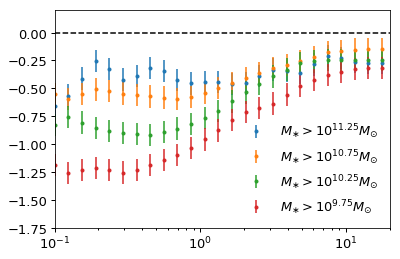

In [22]:
fig, ax = plt.subplots(1, 1)

xscale = ax.set_xscale('log')


__=ax.errorbar(rp, fracdiff_sm11p25_smbell, 0.1, fmt='.', 
               label=r'$M_{\ast} > 10^{11.25}M_{\odot}$')

__=ax.errorbar(rp, fracdiff_sm10p75_smbell, 0.1, fmt='.', 
               label=r'$M_{\ast} > 10^{10.75}M_{\odot}$')

__=ax.errorbar(rp, fracdiff_sm10p25_smbell, 0.1, fmt='.', 
               label=r'$M_{\ast} > 10^{10.25}M_{\odot}$')

__=ax.errorbar(rp, fracdiff_sm9p75_smbell, 0.1, fmt='.', 
               label=r'$M_{\ast} > 10^{9.75}M_{\odot}$')


ylim = ax.set_ylim(-1.75, 0.2)
xlim = ax.set_xlim(0.1, 20)

__=ax.plot(np.logspace(-2, 2, 100), np.zeros(100), '--', color='k')

leg = ax.legend()

In [63]:
cutoff_err = 0.15

wperr_sdss_sm11p25_smbell = np.load(os.path.join(output_dirname, 'sdss_sm11p25_smbell_wperr.npy'))
a = np.load(os.path.join(output_dirname, 'sdss_sm11p25_smbell_small_wperr.npy'))
b = np.load(os.path.join(output_dirname, 'sdss_sm11p25_smbell_large_wperr.npy'))
fracdiff_sm11p25_smbell_err = np.sqrt(a + b)/wp_sdss_sm11p25_smbell
fracdiff_sm11p25_smbell_err = np.maximum(fracdiff_sm11p25_smbell_err, cutoff_err)

wperr_sdss_sm10p75_smbell = np.load(os.path.join(output_dirname, 'sdss_sm10p75_smbell_wperr.npy'))
a = np.load(os.path.join(output_dirname, 'sdss_sm10p75_smbell_small_wperr.npy'))
b = np.load(os.path.join(output_dirname, 'sdss_sm10p75_smbell_large_wperr.npy'))
fracdiff_sm10p75_smbell_err = np.sqrt(a + b)/wp_sdss_sm10p75_smbell
fracdiff_sm10p75_smbell_err = np.maximum(fracdiff_sm10p75_smbell_err, cutoff_err)

wperr_sdss_sm10p25_smbell = np.load(os.path.join(output_dirname, 'sdss_sm10p25_smbell_wperr.npy'))
a = np.load(os.path.join(output_dirname, 'sdss_sm10p25_smbell_small_wperr.npy'))
b = np.load(os.path.join(output_dirname, 'sdss_sm10p25_smbell_large_wperr.npy'))
fracdiff_sm10p25_smbell_err = np.sqrt(a + b)/wp_sdss_sm10p25_smbell
fracdiff_sm10p25_smbell_err = np.maximum(fracdiff_sm10p25_smbell_err, cutoff_err)

wperr_sdss_sm9p75_smbell = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_wperr.npy'))
a = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_small_wperr.npy'))
b = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_large_wperr.npy'))
fracdiff_sm9p75_smbell_err = np.sqrt(a + b)/wp_sdss_sm9p75_smbell
fracdiff_sm9p75_smbell_err = np.maximum(fracdiff_sm9p75_smbell_err, cutoff_err)

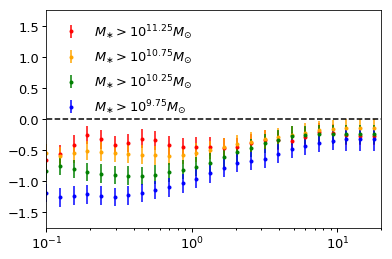

In [64]:
fig, ax = plt.subplots(1, 1)

xscale = ax.set_xscale('log')


__=ax.errorbar(rp, fracdiff_sm11p25_smbell, fracdiff_sm11p25_smbell_err, fmt='.', 
               label=r'$M_{\ast} > 10^{11.25}M_{\odot}$', color='red')

__=ax.errorbar(rp, fracdiff_sm10p75_smbell, fracdiff_sm10p75_smbell_err, fmt='.', 
               label=r'$M_{\ast} > 10^{10.75}M_{\odot}$', color='orange')

__=ax.errorbar(rp, fracdiff_sm10p25_smbell, fracdiff_sm10p25_smbell_err, fmt='.', 
               label=r'$M_{\ast} > 10^{10.25}M_{\odot}$', color='green')

__=ax.errorbar(rp, fracdiff_sm9p75_smbell, fracdiff_sm9p75_smbell_err, fmt='.', 
               label=r'$M_{\ast} > 10^{9.75}M_{\odot}$', color='blue')


ylim = ax.set_ylim(-1.75, 1.75)
xlim = ax.set_xlim(0.1, 20)

__=ax.plot(np.logspace(-2, 2, 100), np.zeros(100), '--', color='k')

leg = ax.legend(loc='upper left')
